In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.optimizers import *
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
num_classes = 10
input_shape = (32,32,3)
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print(f"Number of training: {x_train.shape[0]}")
print(f"Number of training: {x_test.shape[0]}")

Number of training: 50000
Number of training: 10000


In [3]:
x_sample = x_train[0:25]
y_sample = y_train[0:25]

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
print("shape before expand dim:",x_train.shape)

shape before expand dim: (50000, 32, 32, 3)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


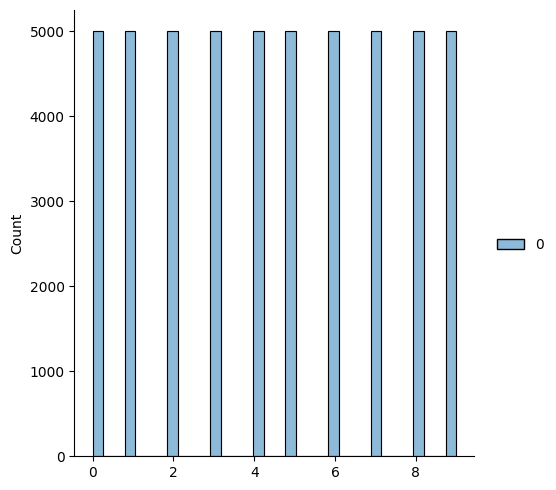

In [4]:
sns.displot(y_train)

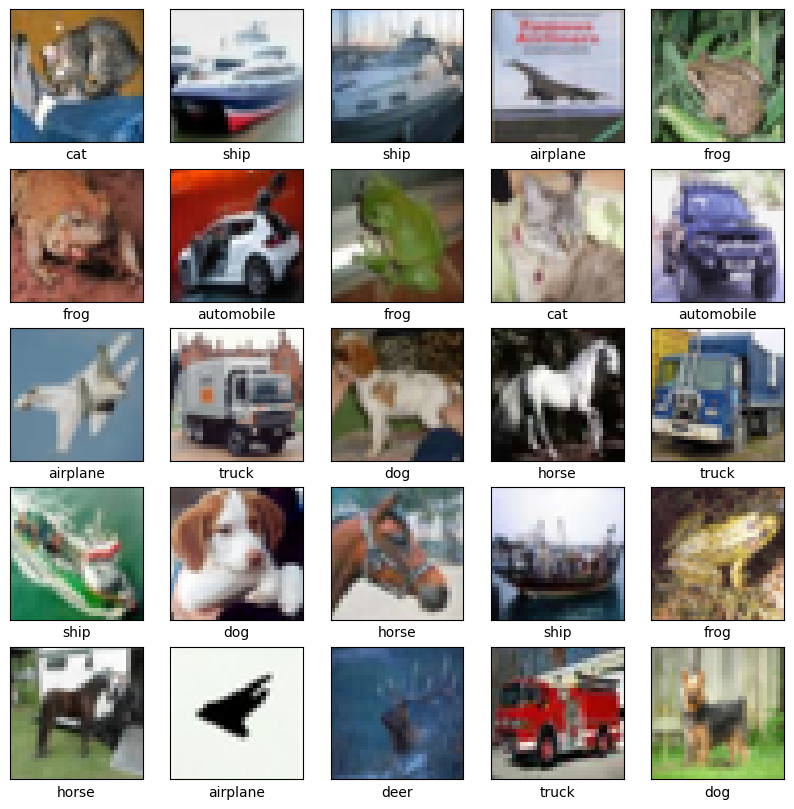

In [5]:
kernel1 =np.array( [[1]])
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))


for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.filter2D(src = x_sample[i], ddepth = -1, kernel = kernel1), cmap = plt.cm.binary)
    plt.xlabel(class_names[int(y_sample[i])])
plt.show()

In [6]:
#define plotter function to draw the training and validation
def plotter(training_history, metric = 'accuracy'):
    # create an empty list to store legends
    legends = []
    # iterate over the items in training_history dictionary
    for key, values in training_history.items():
        # create a list of x values with a range from 1 to length of the metric values + 1
        x = range(1, len(values.history[metric])+1)
        # plot the metric values for each key
        p = plt.plot(x, values.history[metric])
        # add the key to legends
        legends.append(key)
        # plot the validation metric values for each key, with the same color as the corresponding training metric line and dashed line style
        plt.plot(x, values.history['val_' + metric], p[-1].get_color(), linestyle="dashdot")
        # add the key and 'val' to legends
        legends.append(key+' val')
        # set the x-tick labels to the range of x values
        plt.xticks(range(5, len(values.history[metric])+5, 5))
        
    # Set y-axis range from 0.9 to 1.0
    plt.ylim(-0.1,1.1)
    # set x label for plot
    plt.xlabel("Epochs")
    # set y label for plot
    plt.ylabel("Accuracy")
   
    # add legends to the plot
    plt.legend(legends,loc='center left',bbox_to_anchor=(1, 0.5))
    plt.show()

In [7]:
history= {}

In [41]:
#final model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
batch_size = 1024
epochs = 115
history[model.name] = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split =  0.2)

Epoch 1/10
40/40 [==============================] - 4s 104ms/step - loss: 0.4389 - accuracy: 0.8450 - val_loss: 0.6204 - val_accuracy: 0.7960
Epoch 2/10
40/40 [==============================] - 4s 94ms/step - loss: 0.4350 - accuracy: 0.8442 - val_loss: 0.6490 - val_accuracy: 0.7858
Epoch 3/10
40/40 [==============================] - 4s 94ms/step - loss: 0.4328 - accuracy: 0.8462 - val_loss: 0.6053 - val_accuracy: 0.8060
Epoch 4/10
40/40 [==============================] - 4s 94ms/step - loss: 0.4228 - accuracy: 0.8484 - val_loss: 0.6127 - val_accuracy: 0.7983
Epoch 5/10
40/40 [==============================] - 4s 94ms/step - loss: 0.4221 - accuracy: 0.8510 - val_loss: 0.6245 - val_accuracy: 0.7988
Epoch 6/10
40/40 [==============================] - 4s 94ms/step - loss: 0.4230 - accuracy: 0.8484 - val_loss: 0.6271 - val_accuracy: 0.7987
Epoch 7/10
40/40 [==============================] - 4s 94ms/step - loss: 0.4064 - accuracy: 0.8549 - val_loss: 0.6149 - val_accuracy: 0.7978
Epoch 8/10
4

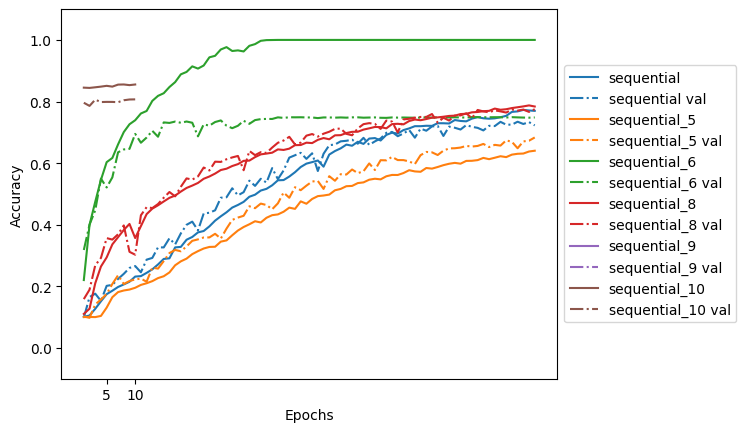

In [52]:
plotter(history)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)
print(y_pred.shape,y_sample.shape)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


'''

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.filter2D(src = x_sample[i], ddepth = -1, kernel = kernel1), cmap = plt.cm.binary)
    plt.xlabel(f'{class_names[int(y_sample[i])]} | {class_names[int(y_pred[i])]}')
plt.show()
'''


313/313 [==============================] - 1s 2ms/step
(10000,) (25, 1)
Confusion Matrix:
 [[863   9  20  10  15   2   6  10  43  22]
 [ 12 886   0   4   1   0   6   0  20  71]
 [ 64   4 671  34  86  48  59  23   6   5]
 [ 21   4  53 569  63 160  57  41  16  16]
 [ 12   3  33  35 806  26  29  49   7   0]
 [ 14   4  29 129  41 713  16  41   6   7]
 [  7   1  34  20  30  17 877   7   4   3]
 [  9   2  18  21  42  38   6 860   0   4]
 [ 56  16   3   5   4   2   3   8 891  12]
 [ 34  43   3   3   2   2   3  10  20 880]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1000
           1       0.91      0.89      0.90      1000
           2       0.78      0.67      0.72      1000
           3       0.69      0.57      0.62      1000
           4       0.74      0.81      0.77      1000
           5       0.71      0.71      0.71      1000
           6       0.83      0.88      0.85      1000
           7       0.82      0.86      0.84  

"\n\nplt.figure(figsize=(10,10))\nfor i in range(25):\n    plt.subplot(5,5,i+1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n    plt.imshow(cv2.filter2D(src = x_sample[i], ddepth = -1, kernel = kernel1), cmap = plt.cm.binary)\n    plt.xlabel(f'{class_names[int(y_sample[i])]} | {class_names[int(y_pred[i])]}')\nplt.show()\n"